# Iris Dataset Classification with apenet's Random Forest

This notebook demonstrates how to build, train, and evaluate a Random Forest model using the apenet library, using the Iris Dataset as an example.


## Import Libraries

In [46]:
import os
os.chdir('..')

import numpy as np
# Data Loading
from sklearn.datasets import load_iris
# Data Visualization
import matplotlib.pyplot as plt

# Import our library
from apenet.rf.tree import DecisionTreeClassifier
from apenet.rf.forest import RandomForestClassifier
from apenet.utils.data import train_test_split
from apenet.utils.metrics import accuracy
from apenet.eye.tree import plot_tree_structure, plot_decision_regions
from apenet.eye.data import plot_confusion_matrix

## Set Random Generator

In [47]:
rng = np.random.default_rng()

## Load Data

In [48]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

## Preprocess Data

In [49]:
# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, rng=rng)

## Train models

In [50]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(n_trees=20, max_depth=5, rng=rng)
rf.fit(X_train, y_train)

## Predict and Evaluate

In [51]:
# Make predictions
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)

# Print accuracy
print(f"Decision Tree Accuracy: {accuracy(y_test, dt_preds):.4f}")
print(f"Random Forest Accuracy: {accuracy(y_test, rf_preds):.4f}")

Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000


# Data Visualization

## Plot confusion matrix

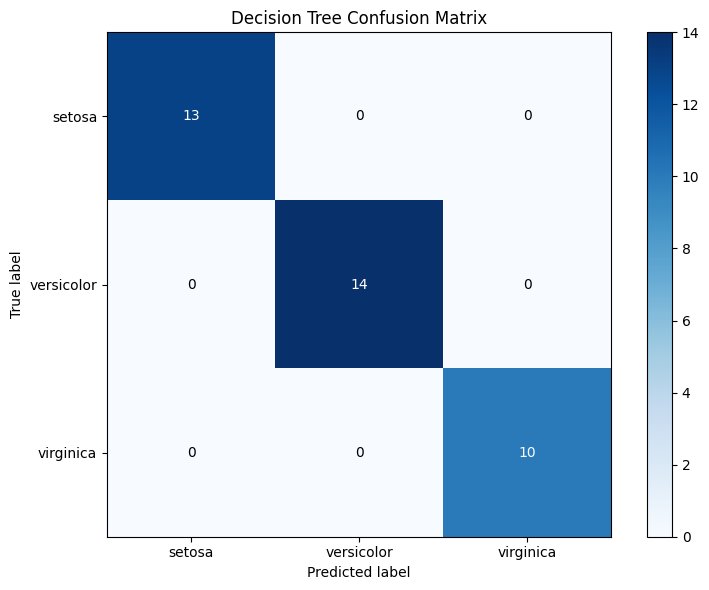

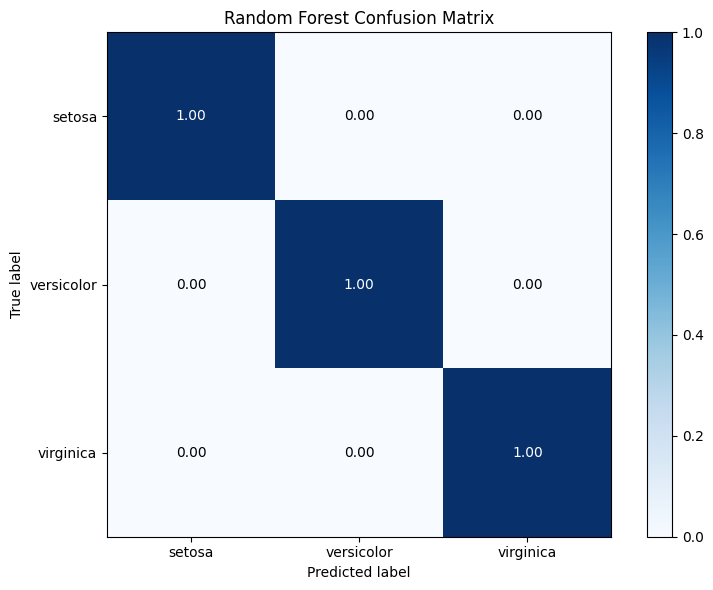

In [52]:
cm_fig1 = plot_confusion_matrix(
    y_test,
    dt_preds,
    class_names=class_names,
    title="Decision Tree Confusion Matrix"
)
cm_fig2 = plot_confusion_matrix(
    y_test,
    rf_preds,
    class_names=class_names,
    title="Random Forest Confusion Matrix",
    normalize=True
)
plt.show()

# Plot Tree Structure

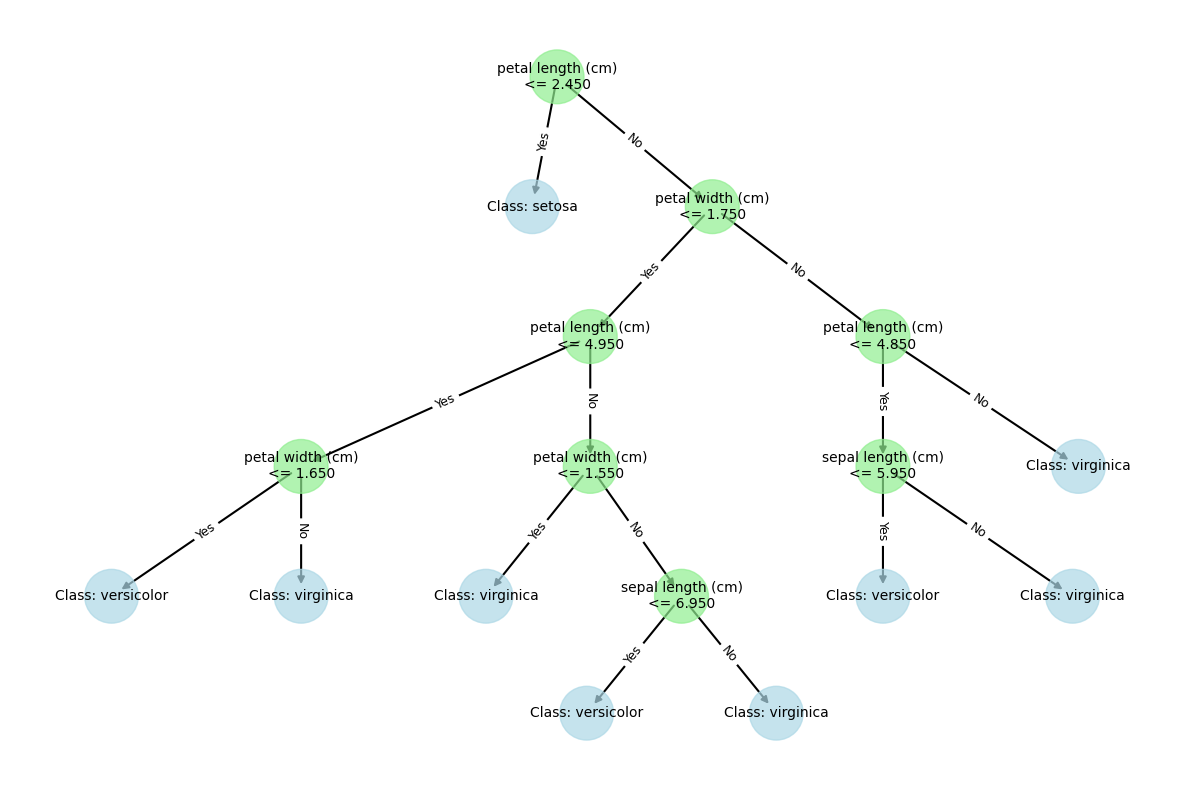

In [53]:
dt_ts_fig = plot_tree_structure(
    dt,
    max_depth=5,
    feature_names=feature_names,
    class_names=class_names
)

plt.show()

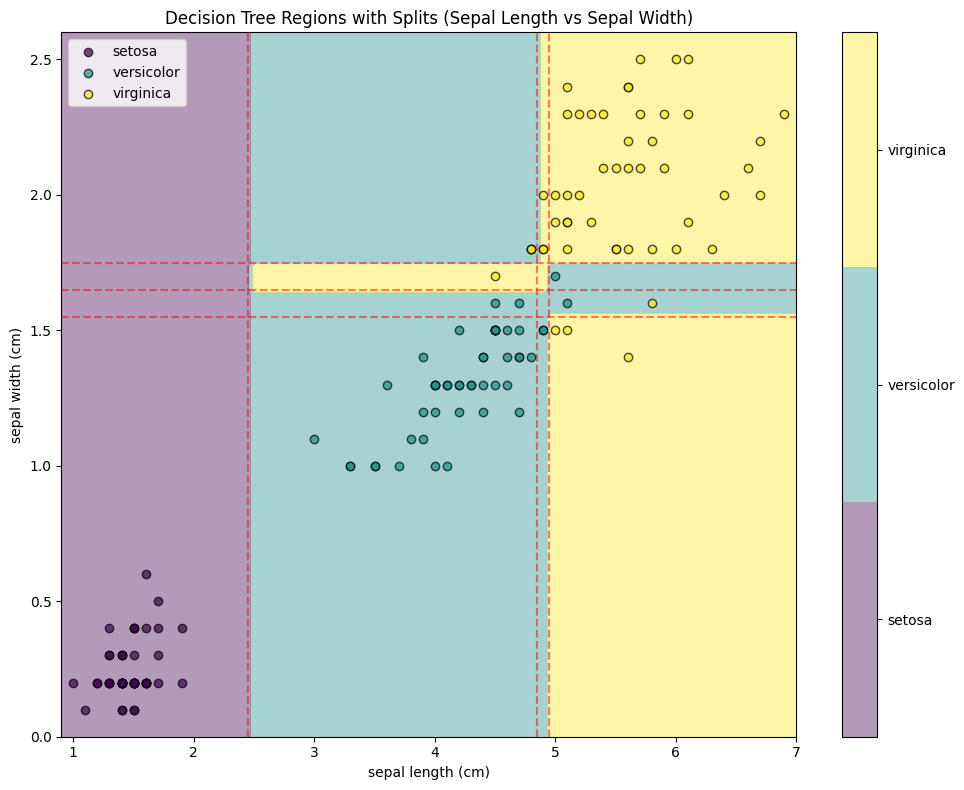

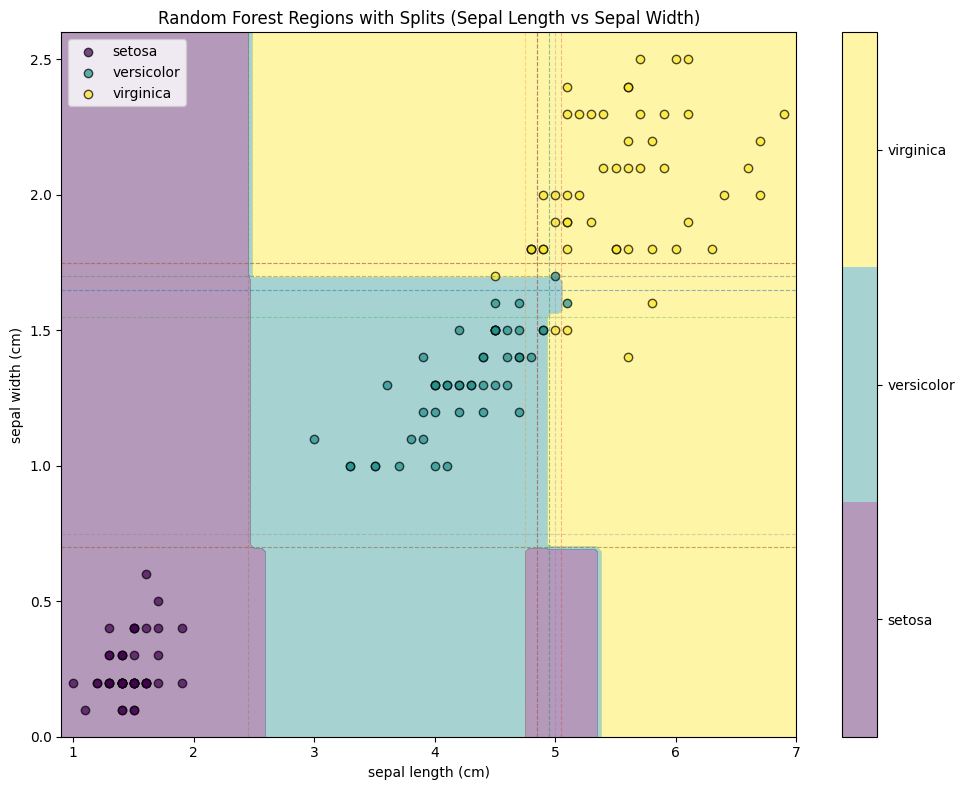

In [54]:
dr_fig = plot_decision_regions(
    dt,
    X,
    y,
    feature_indices=(2, 3),
    feature_names=feature_names,
    class_names=class_names,
    show_tree_splits=True
)
plt.title("Decision Tree Regions with Splits (Sepal Length vs Sepal Width)")
dr_fig = plot_decision_regions(
    rf,
    X,
    y,
    feature_indices=(2, 3),
    feature_names=feature_names,
    class_names=class_names,
    show_tree_splits=True
)
plt.title("Random Forest Regions with Splits (Sepal Length vs Sepal Width)")
plt.show()